In [15]:
class ParameterValues:
    def __init__(self, epsnx, alfax, betax, epsny, alfay, betay, epsnz, alfaz, betaz):
        self.epsnx = epsnx
        self.alfax = alfax
        self.betax = betax
        self.epsny = epsny
        self.alfay = alfay
        self.betay = betay
        self.epsnz = epsnz
        self.alfaz = alfaz
        self.betaz = betaz

In [23]:
# write data files names to text file
import os
def write_folder_names_to_file(data_folder, cache_file):
    # Open the cache file in append mode
    with open(cache_file, "w") as cache:
        # Walk through the directory
        for _, dirs, _ in os.walk(data_folder):
            # For each directory in the directory
            for dir in dirs:
                # Write the directory name to the cache file
                cache.write(dir + "\n")

data_folder = "E:\\data"
cache_file = "tested_params.txt"
write_folder_names_to_file(data_folder, cache_file)


In [21]:
class Particle:
    def __init__(self, Nseed, iq, dt, dW, x, x_prime, y, y_prime):
        self.Nseed = Nseed
        self.iq = iq
        self.dt = dt
        self.dW = dW
        self.x = x
        self.x_prime = x_prime
        self.y = y
        self.y_prime = y_prime
        self.z = 0

    def __repr__(self):
        return f"Particle(Nseed={self.Nseed}, iq={self.iq}, dt={self.dt}, dW={self.dW}, x={self.x}, x'={self.x_prime}, y={self.y}, y'={self.y_prime})"

    def propagate(self, distance):
        import math
        # print(str(self.x) + " " + str(self.y), end=" ")
        # convert angles from milliradians to radians
        angle_x = self.x_prime / 1000 
        angle_y = self.y_prime / 1000
        # print("->", end=" ")
        # calculate new positions
        self.x += distance * math.tan(angle_x)
        self.y += distance * math.tan(angle_y)
        # print(str(self.x) + " " + str(self.y))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Hole:
    def __init__(self, center_x, center_y, center_z, diameter):
        self.center_x = center_x
        self.center_y = center_y
        self.center_z = center_z
        self.diameter = diameter

    def __repr__(self):
        return f"Hole(center_x={self.center_x}, center_y={self.center_y}, center_z={self.center_z}, diameter={self.diameter})"
    
class Grid:
    def __init__(self, size_x, size_y, size_z, hole_diameter, separation):
        self.size_x = size_x
        self.size_y = size_y
        self.size_z = size_z
        self.hole_diameter = hole_diameter
        self.separation = separation
        self.holes = self.create_3d_grid()

    def create_3d_grid(self):
        holes = []
        center_x_offset = ((self.size_x - 1) * self.separation) / 2
        center_y_offset = ((self.size_y - 1) * self.separation) / 2
        center_z_offset = ((self.size_z - 1) * self.separation) / 2
        for x in range(self.size_x):
            for y in range(self.size_y):
                for z in range(self.size_z):
                    hole = Hole(center_x=x*self.separation - center_x_offset, 
                                 center_y=y*self.separation - center_y_offset, 
                                 center_z=z*self.separation - center_z_offset, 
                                 diameter=self.hole_diameter)
                    holes.append(hole)
        return holes

    def plot3D(self, ax=None):
        xs = [hole.center_x for hole in self.holes]
        ys = [hole.center_y for hole in self.holes]
        zs = [hole.center_z for hole in self.holes]
        
        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(xs, ys, zs, c='red')

    def add_to_plot3D(self, ax):
        self.plot3D(ax)

    def add_to_plot_2d(self, ax):
        # Add the grid to the 2D plot
        import matplotlib.patches as patches
        for hole in self.holes:
            ax.plot(hole.center_x, hole.center_y, 'ro')

            # Add circle representing the hole's circumference
            circle = patches.Circle((hole.center_x, hole.center_y), radius=hole.diameter/2, edgecolor='red', facecolor='none')
            ax.add_patch(circle)


    def is_point_in_a_hole(self, point):
        x1, y1, z1 = point
        hole_radius = self.hole_diameter / 2

        # Calculate the indices of the hole the point would belong to if it was in a hole
        x_index = round(x1 / self.separation)
        y_index = round(y1 / self.separation)
        z_index = round(z1 / self.separation)

        # Calculate the center of that hole
        x_center = x_index * self.separation
        y_center = y_index * self.separation
        z_center = z_index * self.separation

        # Check if the point is inside the hole
        # return ((x_center - x1)**2 + (y_center - y1)**2 + (z_center - z1)**2) <= hole_radius**2
        return (x_center - hole_radius <= x1 <= x_center + hole_radius and
                y_center - hole_radius <= y1 <= y_center + hole_radius and
                z_center - hole_radius <= z1 <= z_center + hole_radius)


0
epsnx0.10_alfax2.15_betax54.53_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00
CSV generated successfully.
1
epsnx0.10_alfax0.00_betax175.00_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00
CSV generated successfully.
2
epsnx0.10_alfax0.45_betax368.95_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00
CSV generated successfully.
3
epsnx0.10_alfax-0.76_betax69.79_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00


KeyboardInterrupt: 

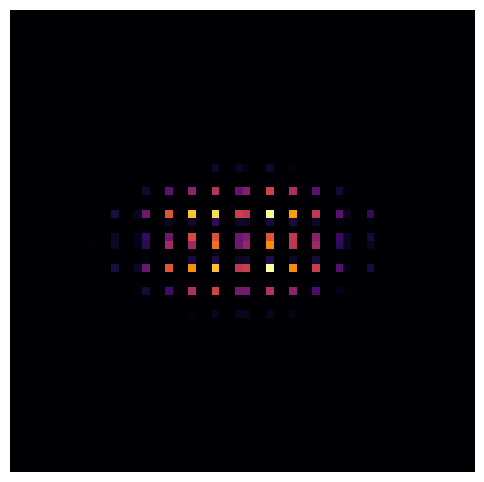

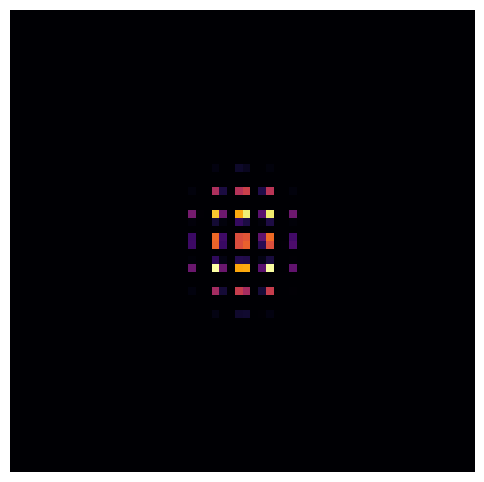

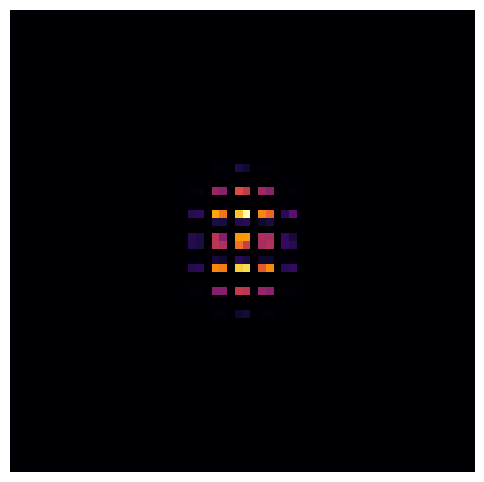

In [22]:
# csv and image generation
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import csv
import json

subfolder = "E:/data"
os.makedirs("images", exist_ok=True)
os.makedirs("csv", exist_ok=True)
i = 0

for foldername in os.listdir(subfolder):
    print(i)
    i += 1
    folder_path = os.path.join(subfolder, foldername)
    image_path = os.path.join("images", f"{foldername}.png")
    csv_path = os.path.join("csv", f"{foldername}.csv")

    # Check if image and CSV already exist
    if os.path.exists(image_path) and os.path.exists(csv_path):
        print(f"Image {foldername}.png and CSV {foldername}.csv already exist, skipping...")
        continue

    if os.path.isdir(folder_path):
        coord_file = os.path.join(folder_path, "coord.out")
        if os.path.isfile(coord_file):
            data = []
            print(foldername)
            with open(coord_file, 'r') as file:
                next(file)
                for line in file:
                    line = line.strip()
                    if line:
                        values = line.split()
                        particle = Particle(
                            Nseed=int(values[0]),
                            iq=int(values[1]),
                            dt=float(values[2]),
                            dW=float(values[3]),
                            x=float(values[4]),
                            x_prime=float(values[5]),
                            y=float(values[6]),
                            y_prime=float(values[7])
                        )
                        data.append(particle)

            size_x, size_y, size_z = 21, 21, 1
            hole_diameter = 0.01
            separation = 0.3

            grid = Grid(size_x, size_y, size_z, hole_diameter, separation)

            particles_in_holes = []
            for particle in data:
                point = (particle.x, particle.y, particle.z)
                if grid.is_point_in_a_hole(point):
                    particles_in_holes.append(particle)

            for particle in particles_in_holes:
                particle.propagate(10)

            if particles_in_holes:
                x_in_holes = [particle.x for particle in particles_in_holes]
                y_in_holes = [particle.y for particle in particles_in_holes]

            bins_hist = 60

            edges_hist = np.linspace(-3, 3, bins_hist + 1)

            H, _, _ = np.histogram2d(x_in_holes, y_in_holes, bins=[edges_hist, edges_hist], density=True)

            fig, ax = plt.subplots(figsize=(6, 6))

            pcm = ax.pcolormesh(edges_hist, edges_hist, H.T, cmap='inferno')

            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_frame_on(False)

            # plt.axis('square')

            # plt.savefig(f"images/{foldername}.png", dpi=64, bbox_inches='tight', pad_inches=0)

            # plt.close(fig)

            # Save particle data to CSV
            csv_data = []
            csv_data.append(["Nseed", "iq", "dt", "dW", "x", "x_prime", "y", "y_prime"])
            for particle in particles_in_holes:
                csv_data.append([particle.Nseed, particle.iq, particle.dt, particle.dW, particle.x, particle.x_prime, particle.y, particle.y_prime])

            # Convert csv_data to a JSON string
            csv_data_json = json.dumps(csv_data)

            csv_json_path = os.path.join(folder_path, f"data.json")
            with open(csv_json_path, 'w') as json_file:
                json_file.write(csv_data_json)

            with open(csv_path, 'w', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(["Nseed", "iq", "dt", "dW", "x", "x_prime", "y", "y_prime"])
                for particle in particles_in_holes:
                    writer.writerow([particle.Nseed, particle.iq, particle.dt, particle.dW, particle.x, particle.x_prime, particle.y, particle.y_prime])

    print("CSV generated successfully.")



In [32]:
import os
import csv
import mysql.connector
import json
import matplotlib.pyplot as plt
import numpy as np

# Connect to the database
cnx = mysql.connector.connect(
    host='srv395.hstgr.io',
    port='3306',
    user='u641848469_iank',
    password='VPCBwkO68!!nCOXa2Yv4',
    database='u641848469_argonneimages',
    connect_timeout=10  # Set connection timeout to 10 minutes
)

# Create a cursor
cursor = cnx.cursor()

# Retrieve the CSV data from the database
sql = "SELECT paramsname, data FROM imagesndata"
cursor.execute(sql)
results = cursor.fetchall()

# Create the "newimages" folder if it doesn't exist
os.makedirs("newimages", exist_ok=True)

# Iterate over the rows
for result in results:
    paramsname = result[0]
    csv_data_str = result[1]

    # Convert the CSV data string to a list
    csv_data = json.loads(csv_data_str)

    # Specify the filename and path for the CSV file
    csv_filename = f"{paramsname}.csv"
    csv_path = os.path.join("csvdump", paramsname, csv_filename)

    # Create the subfolder in the "csvdump" folder if it doesn't exist
    os.makedirs(os.path.dirname(csv_path), exist_ok=True)

    # Save the CSV data to the disk
    with open(csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(csv_data)

    print(f"CSV data saved to: {csv_path}")

    # Read the CSV data
    with open(csv_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Skip the header row

        x_in_holes = []
        y_in_holes = []

        for row in reader:
            x_in_holes.append(float(row[4]))
            y_in_holes.append(float(row[6]))

    # Generate a single histogram for all the particles
    bins_hist = 200
    histo_width = (40 * 0.3) / 2
    edges_hist = np.linspace(-histo_width, histo_width, bins_hist + 1)

    H, _, _ = np.histogram2d(x_in_holes, y_in_holes, bins=[edges_hist, edges_hist])

    fig, ax = plt.subplots(figsize=(8, 8))

    pcm = ax.pcolormesh(edges_hist, edges_hist, H.T, cmap='inferno')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    plt.axis('square')

    # Save the image
    image_filename = f"{paramsname}.png"
    image_path = os.path.join("newimages", image_filename)
    plt.savefig(image_path, dpi=64, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

    print(f"Heatmap image generated: {image_path}")

# Close the cursor and connection
cursor.close()
cnx.close()


CSV data saved to: csvdump\epsnx0.18_alfax4.12_betax498.55_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00\epsnx0.18_alfax4.12_betax498.55_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00.csv
Heatmap image generated: newimages\epsnx0.18_alfax4.12_betax498.55_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00.png


In [ ]:
# search data folder for empty coord files

import os
import shutil

# Specify the path to the folder
path = "E:/data"

# Iterate over all subdirectories in the specified directory
for subdir, dirs, files in os.walk(path):
    # Iterate over all files in the current subdirectory
    for file in files:
        # If the file is 'coord.out'
        if file == 'coord.out':
            # Get the full path to the file
            file_path = os.path.join(subdir, file)
            # Get the size of the file in kilobytes
            file_size_kb = os.path.getsize(file_path) / 1024
            # If the size of the file is less than 100 KB
            if file_size_kb < 100:
                # Print the file path and size
                print(f"File '{file_path}' is {file_size_kb} KB.")
                # Delete the parent folder and all of its contents
                # shutil.rmtree(subdir)
                # print(f"Parent folder '{subdir}' has been deleted.")
                break


In [ ]:
# data compression
import pandas as pd
import h5py
import zipfile
import os

def process_data(filename):
    # Read the data
    data = pd.read_csv(filename, sep='\s+', header=None)

    # Rename columns
    data.columns = ['Nseed', 'iq', 'dt', 'dW', 'x', 'x_prime', 'y', 'y_prime']

    # Remove the first row
    data = data.iloc[1:]

    # Convert data to numeric
    for col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Define the HDF5 file
    h5_file = filename.split(".")[0] + '.h5'

    # Write data to the HDF5 file
    with pd.HDFStore(h5_file, 'w') as store:
        store.put('data', data, format='table', data_columns=True)

    # Define the ZIP file
    zip_file = h5_file.split(".")[0] + '.zip'

    # Compress the HDF5 file into the ZIP file
    with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as myzip:
        myzip.write(h5_file)

    # Delete the HDF5 file
    if os.path.isfile(h5_file):
        os.remove(h5_file)
    
    return zip_file

filename = 'data\epsnx0.08_alfax-3.67_betax489.73_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00\coord.out'
zip_file = process_data(filename)

print("Original filename:", filename)
print("Compressed filename:", zip_file)


C:\Users\ianja\AppData\Local\Temp\ipykernel_40608\3374843033.py:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data\epsnx0.08_alfax-3.67_betax489.73_epsny0.10_alfay-0.55_betay170.00_epsnz5.00_alfaz0.10_betaz10.00\coord.out', sep='\s+', header=None)


In [18]:
import os
import csv
import mysql.connector
import json
import shutil

# Global variables
dump_folder = "dbdump"

# Connect to the database with automatic reconnection
def connect_to_database():
    return mysql.connector.connect(
        host='srv395.hstgr.io',
        port='3306',
        user='u641848469_iank',
        password='VPCBwkO68!!nCOXa2Yv4',
        database='u641848469_argonneimages',
        connect_timeout=1000000,  # Set connection timeout to 10 minutes
        autocommit=True,  # Enable automatic reconnection
        connection_timeout=5,  # Set a short connection timeout
        pool_name="my_connection_pool",  # Specify a connection pool name
        pool_size=5  # Set the connection pool size
    )

# Reconnect to the database
def reconnect_to_database():
    global cnx
    cnx.close()
    cnx = connect_to_database()

# Create the dump folder if it doesn't exist
os.makedirs(dump_folder, exist_ok=True)

try:
    # Connect to the database
    cnx = connect_to_database()

    # Create a cursor
    cursor = cnx.cursor()

    # Retrieve all data from the table
    sql = "SELECT paramsname, image, data, beam, track, log FROM imagesndata"
    cursor.execute(sql)

    # Iterate over the rows
    for paramsname, image_data, csv_data_str, beam_data, track_data, log_data in cursor:
        while True:
            try:
                # Get the folder path for the current row
                folder_path = os.path.join(dump_folder, paramsname)

                # Skip copying if the folder already exists
                if os.path.exists(folder_path):
                    print("Skipped folder!")
                    break

                os.makedirs(folder_path)

                # Save the image
                if image_data is not None:
                    image_path = os.path.join(folder_path, f"{paramsname}.png")
                    with open(image_path, 'wb') as image_file:
                        image_file.write(image_data)

                # Save the CSV data
                if csv_data_str is not None:
                    csv_data = json.loads(csv_data_str)
                    csv_path = os.path.join(folder_path, f"{paramsname}.csv")
                    with open(csv_path, 'w', newline='') as csvfile:
                        writer = csv.writer(csvfile)
                        writer.writerows(csv_data)

                # Save the beam.out file
                if beam_data is not None:
                    beam_path = os.path.join(folder_path, "beam.out")
                    with open(beam_path, 'wb') as beam_file:
                        beam_file.write(beam_data)

                # Save the track.out file
                if track_data is not None:
                    track_path = os.path.join(folder_path, "track.dat")
                    with open(track_path, 'wb') as track_file:
                        track_file.write(track_data)

                # Save the log.out file
                if log_data is not None:
                    log_path = os.path.join(folder_path, "log.out")
                    with open(log_path, 'wb') as log_file:
                        log_file.write(log_data)

                # Break out of the while loop if no exception occurs
                break

            except mysql.connector.Error as err:
                print(f"MySQL Error occurred: {str(err)}")
                if err.errno == 2013 or err.errno == 2055:
                    reconnect_to_database()
                else:
                    # Handle other non-recoverable errors here
                    break

except mysql.connector.Error as err:
    print(f"MySQL Connection Error occurred: {str(err)}")

finally:
    # Close the cursor and connection
    if 'cursor' in locals() and cursor is not None:
        cursor.close()
    if 'cnx' in locals() and cnx is not None:
        cnx.close()


Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped folder!
Skipped 

OperationalError: MySQL Connection not available.

In [19]:
# image dump from imaagesnata
import os
import mysql.connector

# Global variables
dump_folder = "newimages"

# Connect to the database
def connect_to_database():
    return mysql.connector.connect(
        host='srv395.hstgr.io',
        port='3306',
        user='u641848469_iank',
        password='VPCBwkO68!!nCOXa2Yv4',
        database='u641848469_argonneimages',
        connect_timeout=1000000  # Set connection timeout to 10 minutes
    )

# Create the dump folder if it doesn't exist
os.makedirs(dump_folder, exist_ok=True)

try:
    # Connect to the database
    cnx = connect_to_database()

    # Create a cursor
    cursor = cnx.cursor()

    # Retrieve the images from the table
    sql = "SELECT paramsname, image FROM imagesndata"
    cursor.execute(sql)

    # Iterate over the rows
    for paramsname, image_data in cursor:
        # Get the image path
        image_path = os.path.join(dump_folder, f"{paramsname}.png")

        # Save the image
        with open(image_path, 'wb') as image_file:
            image_file.write(image_data)

    print("Images saved successfully!")

except mysql.connector.Error as err:
    print(f"MySQL Connection Error occurred: {str(err)}")

finally:
    # Close the cursor and connection
    if 'cursor' in locals() and cursor is not None:
        cursor.close()
    if 'cnx' in locals() and cnx is not None:
        cnx.close()


Images saved successfully!


In [25]:
# delete database duplicates
import mysql.connector

# Connect to the database
def connect_to_database():
    return mysql.connector.connect(
        host='srv395.hstgr.io',
        port='3306',
        user='u641848469_iank',
        password='VPCBwkO68!!nCOXa2Yv4',
        database='u641848469_argonneimages',
        connect_timeout=10  # Set connection timeout to 10 minutes
)

# Function to check for duplicates and delete all except one
def delete_duplicates():
    # Connect to the database
    cnx = connect_to_database()
    cursor = cnx.cursor()

    # Query to select duplicate paramsname values and their counts
    sql_query = "SELECT paramsname, COUNT(*) FROM imagesndata GROUP BY paramsname HAVING COUNT(*) > 1"

    # Execute the query
    cursor.execute(sql_query)

    # Fetch the results
    results = cursor.fetchall()

    # Delete duplicates except one
    for result in results:
        paramsname, count = result
        # Determine the number of duplicates to be deleted
        num_duplicates = count - 1
        # Delete the duplicates
        delete_query = "DELETE FROM imagesndata WHERE paramsname = %s LIMIT %s"
        cursor.execute(delete_query, (paramsname, num_duplicates))
        # Commit the changes to the database
        cnx.commit()
        print(f"{num_duplicates} duplicates deleted for paramsname: {paramsname}")

    # Close the cursor and connection
    cursor.close()
    cnx.close()

# Call the function to check for duplicates and delete them
delete_duplicates()
